## Chirasthi Amarasingha - 206009L

# Churn Prediction for Iranian Mobile Company - Classification

This notebook provides all the coding performed for the churn analysis of the Iranian Mobile Company. The dataset for this task was sourced from https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

The task is conducted in stages as follows.

1. Data Preprocessing
2. Exploratory Data Analysis
3. Model Building
4. Initial Model evaluation
5. Hyperparameter tuning
6. Final model evaluation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preprocessing & EDA

In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/University Assignment/Machine Learning/Customer Churn.csv')

In [ ]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


In [ ]:
df.info()
# It can be seen that all variables are considered numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [ ]:
# Feature type conversion
df['Complains'] = pd.Categorical(df['Complains'])
df['Age Group'] = pd.Categorical(df['Age Group'])
df['Charge  Amount'] = pd.Categorical(df['Charge  Amount'])
df['Tariff Plan'] = pd.Categorical(df['Tariff Plan'])
df['Status'] = pd.Categorical(df['Status'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Call  Failure            3150 non-null   int64   
 1   Complains                3150 non-null   category
 2   Subscription  Length     3150 non-null   int64   
 3   Charge  Amount           3150 non-null   category
 4   Seconds of Use           3150 non-null   int64   
 5   Frequency of use         3150 non-null   int64   
 6   Frequency of SMS         3150 non-null   int64   
 7   Distinct Called Numbers  3150 non-null   int64   
 8   Age Group                3150 non-null   category
 9   Tariff Plan              3150 non-null   category
 10  Status                   3150 non-null   category
 11  Age                      3150 non-null   int64   
 12  Customer Value           3150 non-null   float64 
 13  Churn                    3150 non-null   int64   
dtypes: categ

In [ ]:
df.describe()

,Call Failure,Subscription Length,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,32.541905,4472.459683,69.460635,73.174921,23.509841,30.998413,470.972916,0.157143
std,7.263886,8.573482,4197.908687,57.413308,112.237560,17.217337,8.831095,517.015433,0.363993
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000
25%,1.000000,30.000000,1391.250000,27.000000,6.000000,10.000000,25.000000,113.801250,0.000000
50%,6.000000,35.000000,2990.000000,54.000000,21.000000,21.000000,30.000000,228.480000,0.000000
75%,12.000000,38.000000,6478.250000,95.000000,87.000000,34.000000,30.000000,788.388750,0.000000
max,36.000000,47.000000,17090.000000,255.000000,522.000000,97.000000,55.000000,2165.280000,1.000000


In [ ]:
# Handling missing values

df.isnull().sum()
# As there are no missing values, no preprocessing is done in this regard

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [ ]:
df['Churn'].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [ ]:
df

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,25,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,55,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,30,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,30,1077.640,0


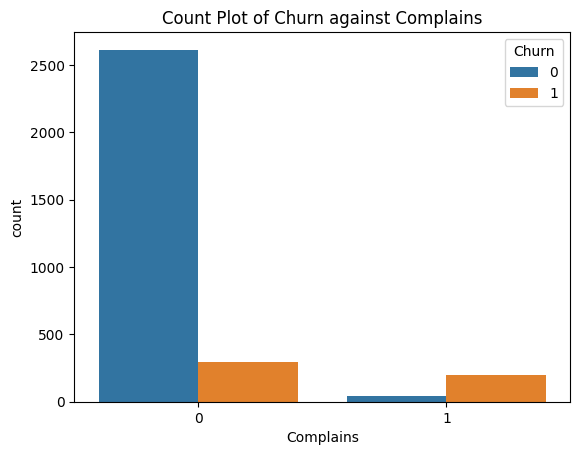

In [ ]:
sns.countplot(x='Complains', hue='Churn', data=df)
plt.title('Count Plot of Churn against Complains')
plt.show()

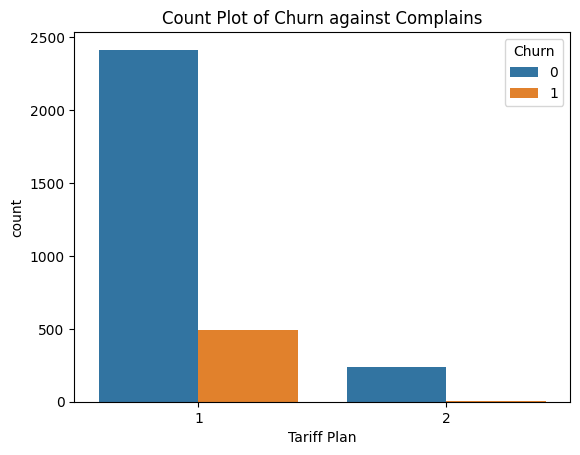

In [ ]:
sns.countplot(x='Tariff Plan', hue='Churn', data=df)
plt.title('Count Plot of Churn against Complains')
plt.show()

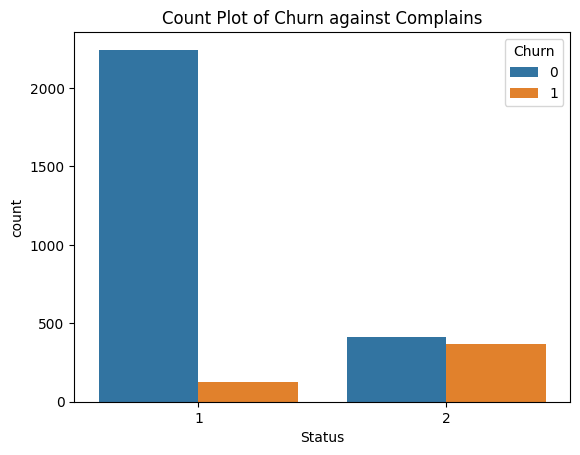

In [ ]:
sns.countplot(x='Status', hue='Churn', data=df)
plt.title('Count Plot of Churn against Complains')
plt.show()

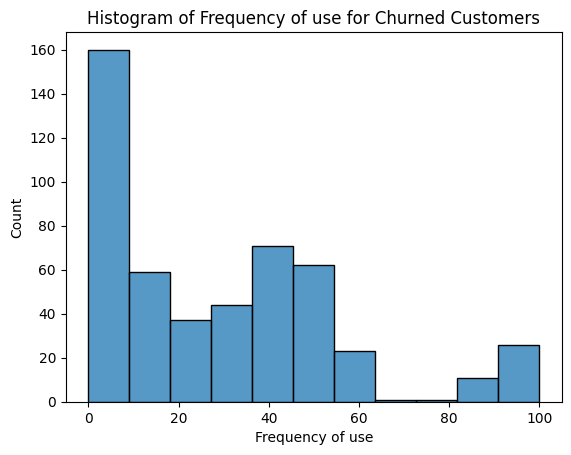

In [ ]:
churn_df = df[df['Churn']==1]
sns.histplot(x='Frequency of use', data=churn_df)
plt.title('Histogram of Frequency of use for Churned Customers')
plt.show()

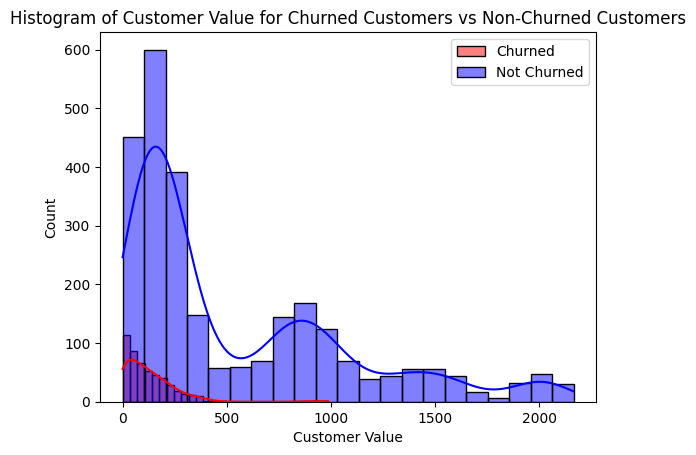

In [ ]:
churn_df = df[df['Churn']==1]
not_churn_df = df[df['Churn']==0]
sns.histplot(x='Customer Value', data=churn_df, color='red', label='Churned', kde=True)
sns.histplot(x='Customer Value', data=not_churn_df, color='blue', label='Not Churned', kde=True)
plt.title('Histogram of Customer Value for Churned Customers vs Non-Churned Customers')
plt.legend()
plt.show()


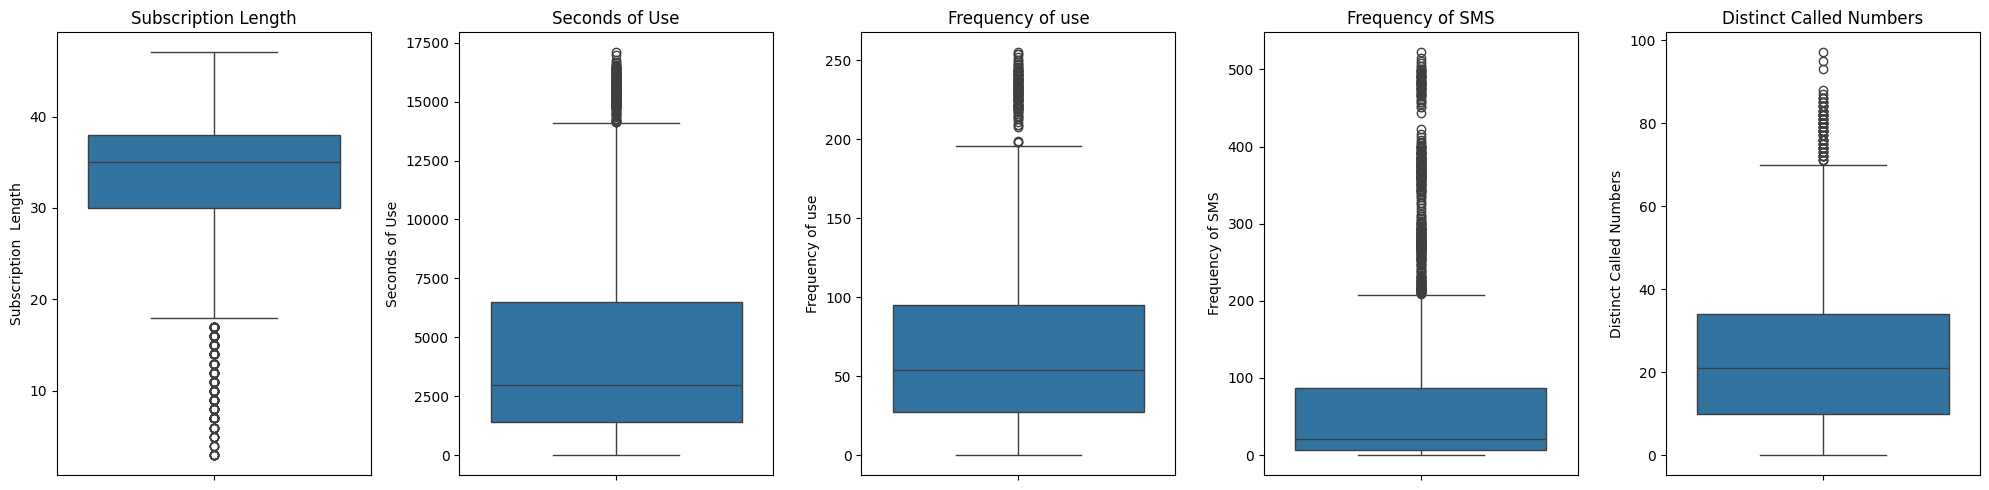

In [ ]:
# Boxplots of numerical features
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

sns.boxplot(y='Subscription  Length', data=df, ax=axes[0])
axes[0].set_title('Subscription Length')

sns.boxplot(y='Seconds of Use', data=df, ax=axes[1])
axes[1].set_title('Seconds of Use')

sns.boxplot(y='Frequency of use', data=df, ax=axes[2])
axes[2].set_title('Frequency of use')

sns.boxplot(y='Frequency of SMS', data=df, ax=axes[3])
axes[3].set_title('Frequency of SMS')

sns.boxplot(y='Distinct Called Numbers', data=df, ax=axes[4])
axes[4].set_title('Distinct Called Numbers')

plt.tight_layout()
plt.show()

# It can be seen that each of the features has some outliers indicating that noise is present.
# In this case however, we will not be removing outliers as they will be dealt with during standardization

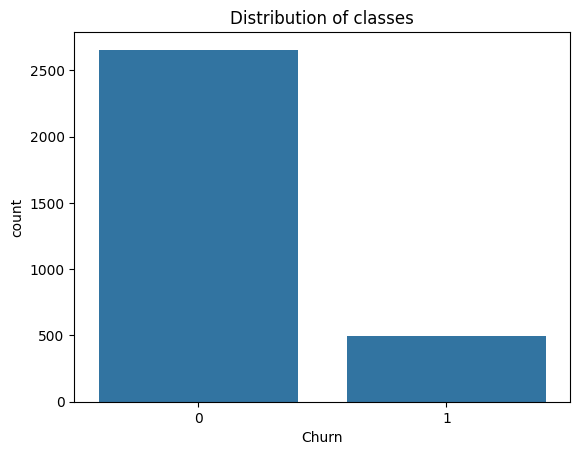

In [ ]:
# Data imbalance

sns.countplot(x='Churn', data=df)
plt.title('Distribution of classes')
plt.show()

# It can be seen that the dataset is highly imbalanced. This must be handled in order to obtain reliable results.
# This will be addressed through weight adjustment and random oversampling

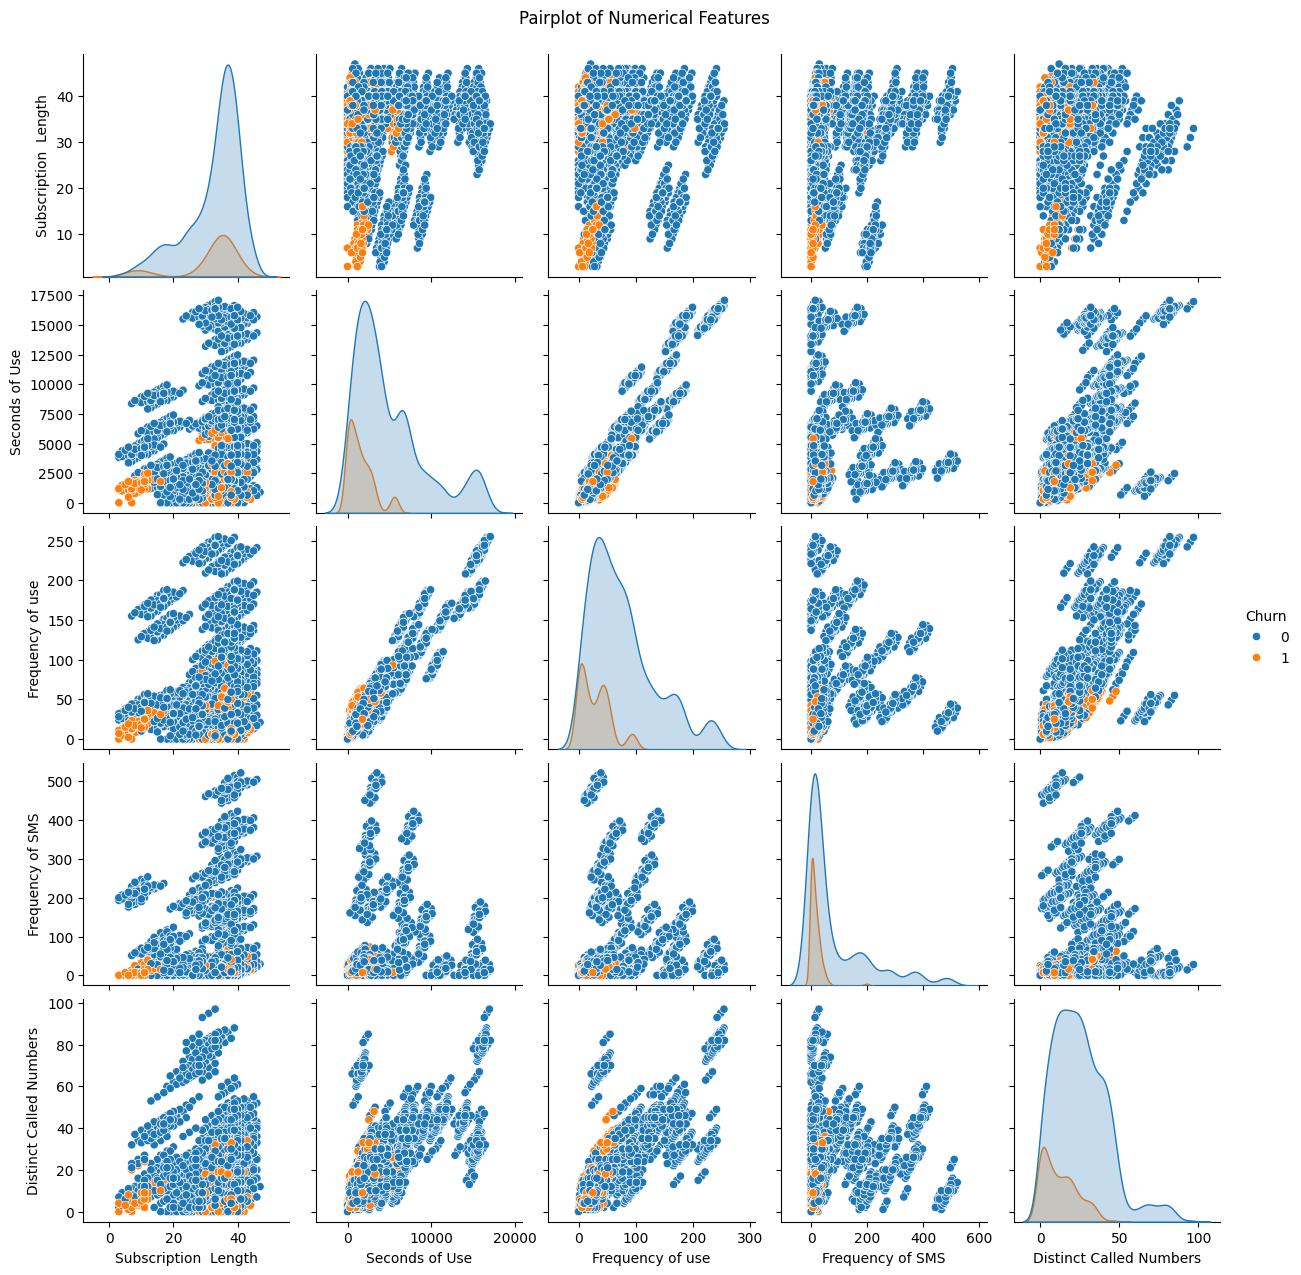

In [ ]:
sns.pairplot(df, vars=['Subscription  Length', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers'], hue='Churn')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


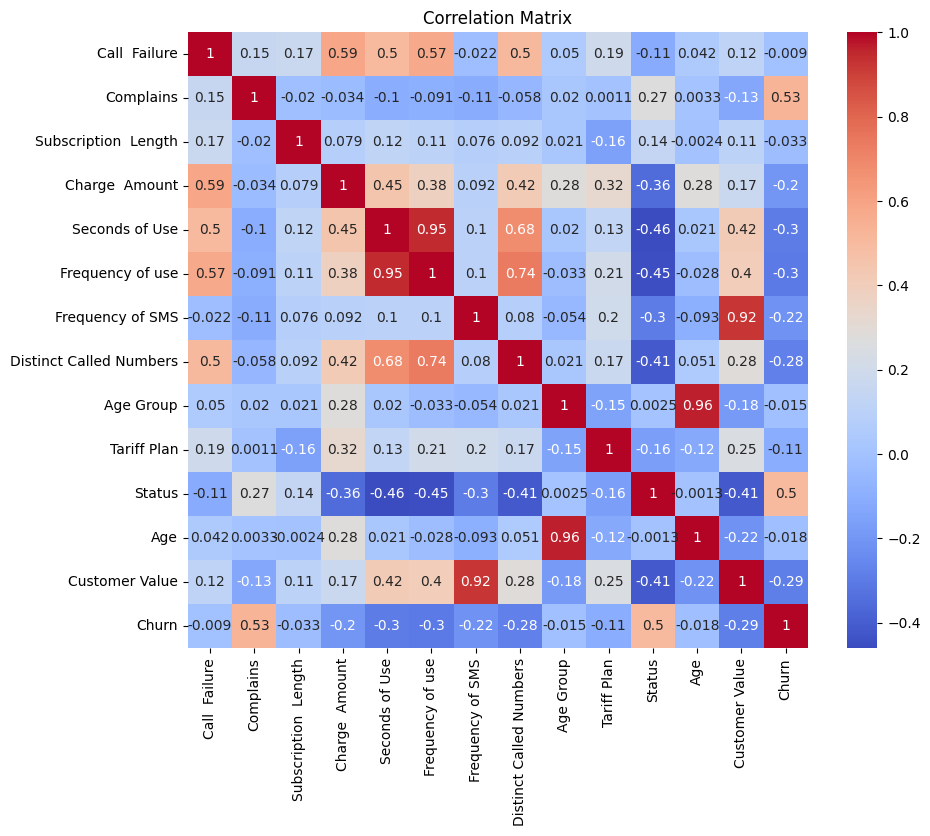

In [ ]:
# Correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# It can be seen that seconds of use and frequency of use are highly correlated with each other
# It can be seen that age and age group are highly correlated with each other
# It can be seen that sfrequency of sms and customer value are highly correlated with each other

# Having highly correlated features lead to overfitting models. Therefore, these variables would be removed

In [ ]:
# Drop correlated features

df = df.drop(['Seconds of Use', 'Age Group'], axis=1)

In [ ]:
# Categorical variable encoding

# All algorithms used here except Logistic Regression can handle categorical variables directly.
# However, as the categorical variables are already numerical in nature, no additional encoding is necessary.

## Model Building

For this task, several models would be created and compared to identify the best performing model. They are;

1. Logistic Regression - simple and easy to understand. Useful as a baseline model  
2. Random Forest - reduces overfitting and gives insights on feature importance
3. LGBMBoost - gives high accuracy and flexible
4. Stacking

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

numerical_features = ['Subscription  Length', 'Frequency of use', "Frequency of SMS", 'Distinct Called Numbers', 'Age', 'Customer Value','Call  Failure']
categorical_features = ['Complains', 'Charge  Amount', 'Tariff Plan', 'Status']

scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Train, test data data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, title, figsize=(5,4)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    plt.title(title)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score

model=LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[[443  88]
 [ 13  86]]
Accuracy:  0.8396825396825397
F1 Score:  0.8556130799291893
Precision: 0.4942528735632184
Recall: 0.8686868686868687
AUC: 0.9233768951283076


In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
clf = GridSearchCV(lr, tuned_parameters, cv=5, scoring='f1')
clf.fit(X, y)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}],
             scoring='f1')

In [ ]:
clf.best_params_

{'C': 10}

In [ ]:
model=LogisticRegression(C=10, random_state=42, max_iter=1000, class_weight='balanced',penalty='l2',solver='saga')
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[[443  88]
 [ 13  86]]
Accuracy:  0.8396825396825397
F1 Score:  0.8556130799291893
Precision: 0.4942528735632184
Recall: 0.8686868686868687
AUC: 0.9260020163974966


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1, class_weight='balanced')
model.fit(X_train, y_train)

model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)

accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[[519  12]
 [ 17  82]]
Accuracy:  0.953968253968254
F1 Score:  0.9534798410285831
Precision: 0.8723404255319149
Recall: 0.8282828282828283
AUC: 0.9841256253685633


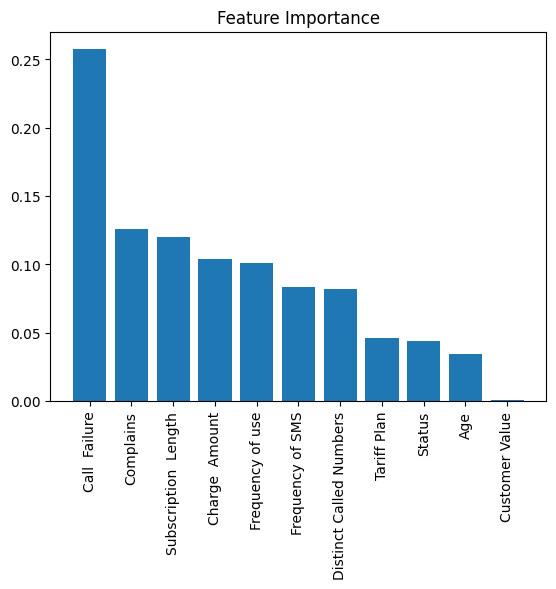

In [ ]:
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

names = X.columns

# Create plot
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

<ipython-input-120-db8ea210b282>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


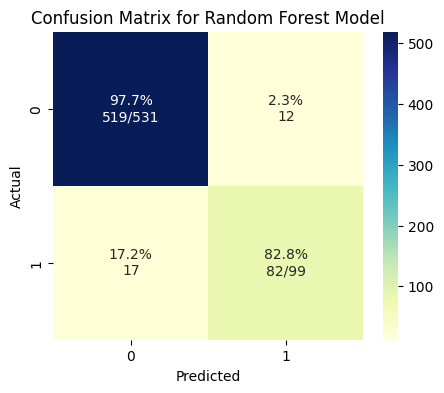

In [ ]:
cm = plot_cm(y_test, pred, "Confusion Matrix for Random Forest Model", figsize=(5,4))

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight='balanced')
# Select the optimal C parameter by cross-validation
tuned_parameters = [{'n_estimators': [1, 10, 50, 100], 'min_samples_split': [2, 3, 5]}]
clf = GridSearchCV(rf, tuned_parameters, cv=5, scoring='f1')
clf.fit(X, y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=0),
             param_grid=[{'min_samples_split': [2, 3, 5],
                          'n_estimators': [1, 10, 50, 100]}],
             scoring='f1')

In [ ]:
print(clf.best_params_)

{'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1, class_weight='balanced', min_samples_split=5)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[[517  14]
 [ 12  87]]
Accuracy:  0.9587301587301588
F1 Score:  0.9588975741239892
Precision: 0.8613861386138614
Recall: 0.8787878787878788
AUC: 0.9850862675721432


### LightGBM

In [ ]:
# Load libraries
from lightgbm import LGBMClassifier

gbc = LGBMClassifier(n_estimators=10, random_state=42, class_weight='balanced')
gbc.fit(X_train, y_train)
model = gbc.fit(X_train, y_train)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 396, number of negative: 2124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 2520, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 396, number of negative: 2124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

In [ ]:
tuned_parameters = [{'n_estimators': [1, 10, 50, 100], 'learning_rate': [0.01, 0.1, 1]}]
clf = GridSearchCV(gbc, tuned_parameters, cv=5, scoring='f1')
clf.fit(X, y)

In [ ]:
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [ ]:
gbc = LGBMClassifier(n_estimators=100, random_state=42, class_weight='balanced', learning_rate=0.1)
gbc.fit(X_train, y_train)
model = gbc.fit(X_train, y_train)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# Testing model
y_proba = model.predict_proba(X_test)[:, 1]
score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, pred)
print(cm)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 396, number of negative: 2124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000497 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 2520, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 396, number of negative: 2124
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number

<ipython-input-120-db8ea210b282>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


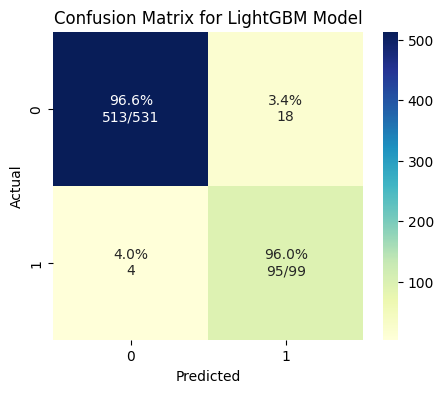

In [ ]:
cm = plot_cm(y_test, pred, "Confusion Matrix for LightGBM Model", figsize=(5,4))

### Stacking Classifier

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

lr = LogisticRegression(C=10, random_state=42, max_iter=1000, class_weight='balanced',penalty='l2',solver='saga')
gbc = LGBMClassifier(n_estimators=100, random_state=42, class_weight='balanced', learning_rate=0.1)
rf = RandomForestClassifier(n_estimators = 100, random_state=0, n_jobs=-1, class_weight='balanced', min_samples_split=5)

meta_classifier = gbc

stacking_clf = StackingClassifier(
    estimators=[('lr', lr), ('rf', rf)],
    final_estimator=meta_classifier,
    cv=StratifiedKFold(n_splits=5)
)

stacking_clf.fit(X_train, y_train)

# Make predictions
pred = stacking_clf.predict(X_test)
y_proba = stacking_clf.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, pred)
print(cm)
accuracy = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred, average='weighted')
precision = precision_score(y_test, pred, pos_label=1)
recall = recall_score(y_test, pred, pos_label=1)
auc = roc_auc_score(y_test, y_proba)
print('Accuracy: ', str(accuracy))
print('F1 Score: ', str(f1))
print("Precision:", precision)
print("Recall:", recall)
print("AUC:", auc)

[LightGBM] [Info] Number of positive: 396, number of negative: 2124
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 2520, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[[503  28]
 [  5  94]]
Accuracy:  0.9476190476190476
F1 Score:  0.9497649833606352
Precision: 0.7704918032786885
Recall: 0.9494949494949495
AUC: 0.9821377617987787


# Customer Value Prediction for Iranian Mobile Company - Regression

The task is conducted in stages as follows.

1. Data Preprocessing - same as previous
2. Exploratory Data Analysis - same as previous
3. Model Building
4. Initial Model evaluation
5. Hyperparameter tuning
6. Final model evaluation

## Model Building

For this task, several models would be created and compared to identify the best performing model. They are;

1. Linear Regression
2. Random Forest
3. Lasso Regression

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

numerical_features = ['Subscription  Length', 'Frequency of use', "Frequency of SMS", 'Distinct Called Numbers', 'Age','Call  Failure']
categorical_features = ['Complains', 'Charge  Amount', 'Tariff Plan', 'Status']

scaler = RobustScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
X = df.drop('Customer Value', axis=1)
y = df['Customer Value']

# Train, test data data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
import math
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

reg = LinearRegression()

reg.fit(X_train, y_train)
pred = reg.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2_score(y_test, pred))
print("MAE:",mean_absolute_error(y_test,pred))
RMSE = math.sqrt(mse)
print("Root Mean Square Error:", RMSE)

Mean Squared Error (MSE): 0.015325200465615398
R-squared: 0.9727776853941061
MAE: 0.08362943743087149
Root Mean Square Error: 0.12379499370174626


### Ridge Regression


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}
rd = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

rd.fit(X_train, y_train)

# Get the best model
tuned_parameter = rd.best_estimator_
print(tuned_parameter)

Ridge(alpha=1)


In [ ]:
pred = tuned_parameter.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2_score(y_test, pred))
print("MAE:",mean_absolute_error(y_test,pred))
RMSE = math.sqrt(mse)
print("Root Mean Square Error:", RMSE)

Mean Squared Error (MSE): 0.015331964932113413
R-squared: 0.9727656696011928
MAE: 0.08365825438135882
Root Mean Square Error: 0.12382231193170887


### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2_score(y_test, pred))
print("MAE:",mean_absolute_error(y_test,pred))
RMSE = math.sqrt(mse)
print("Root Mean Square Error:", RMSE)

Mean Squared Error (MSE): 0.005057441487630633
R-squared: 0.9910164135479939
MAE: 0.0260830878209061
Root Mean Square Error: 0.07111569086798379


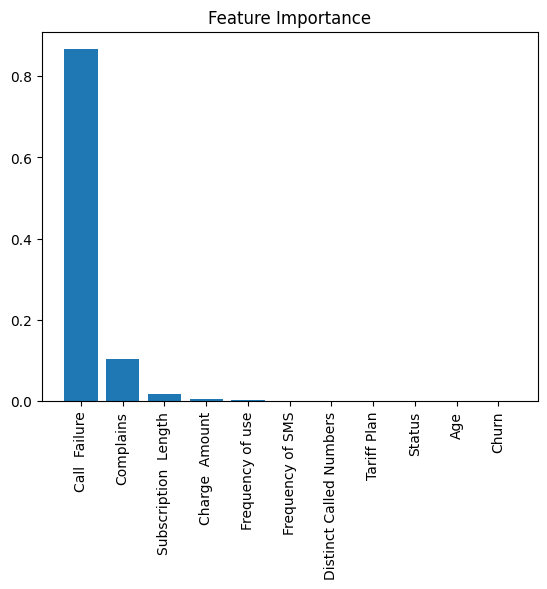

In [ ]:
importances = rf.feature_importances_

indices = np.argsort(importances)[::-1]

names = X.columns

# Create plot
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

In [ ]:
# Hyperparameter tuning for Random Forest
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

ht = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ht.fit(X_train, y_train)

best_rf = ht.best_estimator_

In [ ]:
# Results after hyperparameter tuning

pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2_score(y_test, pred))
print("MAE:",mean_absolute_error(y_test,pred))
RMSE = math.sqrt(mse)
print("Root Mean Square Error:", RMSE)

Mean Squared Error (MSE): 0.005057441487630633
R-squared: 0.9910164135479939
MAE: 0.0260830878209061
Root Mean Square Error: 0.07111569086798379


### LightGBM Regression

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

lgb = LGBMRegressor(random_state=42)
lgb.fit(X_train, y_train)
pred = lgb.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2_score(y_test, pred))
print("MAE:",mean_absolute_error(y_test,pred))
RMSE = math.sqrt(mse)
print("Root Mean Square Error:", RMSE)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 1890, number of used features: 11
[LightGBM] [Info] Start training from score 0.375407
Mean Squared Error (MSE): 0.003282039269896856
R-squared: 0.994170079161151
MAE: 0.02714167150150881
Root Mean Square Error: 0.057289085085178805
